<a href="https://colab.research.google.com/github/Meridor6919/BeeClassification/blob/master/BeeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:

import keras
from keras import layers
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt

In [3]:
dataset = tfds.load('bee_dataset', split=['train'], as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/7490 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/bee_dataset/bee_dataset_300/1.0.0.incomplete3NRHRZ/bee_dataset-train.tfrecord*…

Dataset bee_dataset downloaded and prepared to ~/tensorflow_datasets/bee_dataset/bee_dataset_300/1.0.0. Subsequent calls will reuse this data.


In [4]:
#Split between training data, validation data, test data
splitSize = (0.0, 0.765, 0.9, 1.0)

Testing precision on red channel only

In [5]:
array = np.vstack(tfds.as_numpy(dataset[0]))
ranges = list([int(array.shape[0] * x) for x in splitSize])

def getDataset(ranges, idx):
    return (
        np.array(list(map(lambda x: x[0][:, :, :], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['varroa_output'], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['pollen_output'], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['wasps_output'], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['cooling_output'], array[ranges[idx]: ranges[idx + 1]])))
    )
train_images, train_labels1,train_labels2,train_labels3, train_labels4= getDataset(ranges, 0)
validation_images, validation_labels1,validation_labels2, validation_labels3, validation_labels4 = getDataset(ranges, 1)
test_images, test_labels1,test_labels2,test_labels3, test_labels4  = getDataset(ranges, 2)


<ipython-input-5-e43ac078c997>:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  array = np.vstack(tfds.as_numpy(dataset[0]))
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


In [6]:
train_labels = np.dstack((train_labels1, train_labels2, train_labels3,train_labels4)).squeeze()
validation_labels = np.dstack((validation_labels1,validation_labels2, validation_labels3, validation_labels4)).squeeze()
test_labels = np.dstack((test_labels1,test_labels2,test_labels3, test_labels4)).squeeze()
train_labels.shape, train_labels[:10]

((5729, 4), array([[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]))

In [12]:
model= tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(300, 150, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4, activation="sigmoid") 
])

threshold= .9
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.BinaryAccuracy(threshold=threshold))

history = model.fit(train_images, train_labels,
                        epochs=20,
                        batch_size = 32,
                    
                        validation_data=(validation_images, validation_labels))

Epoch 1/20
180/180 [==============================] - 8s 41ms/step - loss: 2.7609 - binary_accuracy: 0.8780 - val_loss: 0.2675 - val_binary_accuracy: 0.8980
Epoch 2/20
180/180 [==============================] - 7s 39ms/step - loss: 0.1386 - binary_accuracy: 0.9322 - val_loss: 0.5126 - val_binary_accuracy: 0.8958
Epoch 3/20
180/180 [==============================] - 7s 39ms/step - loss: 0.1206 - binary_accuracy: 0.9366 - val_loss: 0.2066 - val_binary_accuracy: 0.9197
Epoch 4/20
180/180 [==============================] - 7s 39ms/step - loss: 0.0659 - binary_accuracy: 0.9547 - val_loss: 0.2185 - val_binary_accuracy: 0.9177
Epoch 5/20
180/180 [==============================] - 7s 39ms/step - loss: 0.0531 - binary_accuracy: 0.9608 - val_loss: 0.2432 - val_binary_accuracy: 0.9271
Epoch 6/20
180/180 [==============================] - 7s 40ms/step - loss: 0.0395 - binary_accuracy: 0.9691 - val_loss: 0.2328 - val_binary_accuracy: 0.9308
Epoch 7/20
180/180 [==============================] - 7s 4

In [13]:
model.evaluate(test_images, test_labels)

24/24 [==============================] - 0s 18ms/step - loss: 0.4992 - binary_accuracy: 0.9372


[0.4991718828678131, 0.9372496604919434]

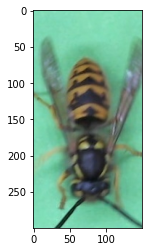

In [27]:
x = test_images[555]
plt.imshow(x)

In [28]:
model.predict(x.reshape(1,300,150,3)), test_labels[555]

1/1 [==============================] - 0s 16ms/step


(array([[3.9292002e-13, 5.8324233e-13, 1.0000000e+00, 7.8293532e-16]],
       dtype=float32), array([0., 0., 1., 0.]))

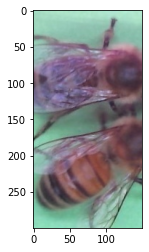

In [29]:
x = test_images[144]
plt.imshow(x)

In [30]:
model.predict(x.reshape(1,300,150,3)), test_labels[144]

1/1 [==============================] - 0s 16ms/step


(array([[8.4687030e-04, 3.5032745e-08, 2.6575184e-10, 7.7691331e-13]],
       dtype=float32), array([0., 0., 0., 0.]))